<a href="https://colab.research.google.com/github/MitchMatt/Accidents-in-kenya/blob/Michael/Accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align: center;">Road Accidents Fatality Prediction in Kenya </h1>



##  Project Overview
The goal of this project is to build a machine learning model that predicts the probability of fatal outcomes in road crashes using historical crash data. Insights from this model will help transportation agencies, public safety departments, and urban planners develop data-driven interventions to reduce fatalities.

#### Main Objective(s)
* Analyze historical crash data from 2012-2023 to identify fatality patterns.
* Train a machine learning model to predict fatality likelihood in road crashes.
* Deploy a web-based interface for real-time fatality risk prediction.

##### Specific Objectives
* Identify key factors influencing fatality risks (e.g., location, time of day).
* Provide data-driven insights to support road safety campaigns and infrastructure planning

###  1 Business Understanding
Road traffic accidents are a significant public safety concern in Kenya, contributing to high fatality rates. Effective measures to reduce fatalities require identifying the factors that increase the likelihood of death in accidents.The goal of this project is to build a machine learning model that predicts the probability of fatal outcomes in road crashes using historical crash data. Insights from this model will help transportation agencies, public safety departments, and urban planners develop data-driven interventions to reduce fatalities.

## 1.2 Stakeholders
 * Transportation agencies i.e Supermetro sacco, Utimo sacco
 * Public safety departments i.e NTSA
 * Urban planners i.e KURA, KENHA
 * Cyclists and Pedestrians
 * Private car-owners

###  2 Data Understanding
The project will utilize crash data collected from Kenya’s road accidents between 2012-2023, sourced from the World Bank microdata platform. The dataset contains multiple features that describe road crashes and their outcomes.
Dataset Overview:
* Crash Date and Time: When the crash occurred (time of day, date).
* Location: Geographic details such as latitude, longitude.
* Crash Description Keywords: Keywords that describe the nature of the crash (e.g., “fatality,” “pedestrian,” “motorcycle”).
* Crash Outcome: Binary indicator (fatal or non-fatal).

#### 2.1 Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
#Data plotting
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# from sklearn
from xgboost import XGBClassifier
import sklearn.metrics as metrics
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble  import GradientBoostingClassifier,RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
!pip install streamlit
import streamlit as st
import joblib


     ---------------------------------------- 0.0/41.9 kB ? eta -:--:--
     -------------------------------------  41.0/41.9 kB 960.0 kB/s eta 0:00:01
     -------------------------------------  41.0/41.9 kB 960.0 kB/s eta 0:00:01
     -------------------------------------- 41.9/41.9 kB 201.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.6 MB 2.0 MB/s eta 0:00:05
    --------------------------------------- 0.1/8.6 MB 1.4 MB/s eta 0:00:06
    --------------------------------------- 0.2/8.6 MB 1.3 MB/s eta 0:00:07
   - -------------------------------------- 0.3/8.6 MB 1.4 MB/s eta 0:00:07
   - -------------------------------------- 0.3/8.6 MB 1.3 MB/s eta 0:00:07
   - -------------------------------------- 0.4/8.6 MB 1.4 MB/s eta 0:00:06
   -- ------------------------------------- 0.5/8.6 MB 1.4 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/8.6 MB 1.4 MB/s eta 0:00:06
   --- ----

#### LOADING THE DATASET

In [2]:
data = pd.read_csv('ma3route_crashes_algorithmcode.csv')
data.head(20)

,crash_id,crash_datetime,crash_date,latitude,longitude,n_crash_reports,contains_fatality_words,contains_pedestrian_words,contains_matatu_words,contains_motorcycle_words
0,1,06/06/2018 20:39,06/06/2018,-1.263030,36.764374,1,0,0,0,0
1,2,17/08/2018 06:15,17/08/2018,-0.829710,37.037820,1,1,0,0,0
2,3,25/05/2018 17:51,25/05/2018,-1.125301,37.003297,1,0,0,0,0
3,4,25/05/2018 18:11,25/05/2018,-1.740958,37.129025,1,0,0,0,0
4,5,25/05/2018 21:59,25/05/2018,-1.259392,36.842321,1,1,0,0,0
5,6,26/05/2018 07:11,26/05/2018,-1.215499,36.835150,1,0,0,0,0
6,7,26/05/2018 07:42,26/05/2018,-1.372556,36.920491,1,1,0,0,0
7,8,26/05/2018 07:52,26/05/2018,-1.209940,36.833173,1,0,0,0,0
8,9,26/05/2018 11:51,26/05/2018,-1.314351,36.807909,1,0,0,0,0
9,10,26/05/2018 15:42,26/05/2018,-1.206788,36.854991,1,0,0,0,0


#### CLASS CREATION

In [3]:
#load the dataset
class DataUnderstanding:
    def __init__(self, data = None):
      self.df = data
    #Load Data
    def load_data(self,path):
      # Try reading with 'latin-1' encoding and specifying the delimiter as '\t'
      self.df = pd.read_csv(path, encoding='latin-1', delimiter='\t')
      return self.df
    def data_understanding(self):
      # First five rows of the dataset
      print('n\n\First five rows of the dataset')
      print('-' * 5)
      print(self.df.head())

      # Dataset Info
      print('n\n\Dataset Info')
      print('-' * 5)
      print(self.df.info())

      # Statistical Sumary of the dataset
      print('n\n\Stastical summary')
      print('-' * 5)
      print(self.df.describe())
# Total Null values per column
      print('\n\nNull values per column')
      print('-' * 5)
      print(self.df.isnull().sum())

      # Unique Values
      print("\n\nUNIQUE VALUES")
      print("-"*12)
      for col in self.df.columns:
          print(f"Column *{col}* has {self.df[col].nunique()} unique values")
          if self.df[col].nunique() < 12:
              print(f"Top unique values in the *{col}* include:")
              for idx in self.df[col].value_counts().index:
                  print(f"- {idx}")
          print("")

      # Total Duplicates in the dataset
      print('n\n\Total duplicated rows in the dataset')
      print('-'* 5)
      print(self.df.duplicated().sum())

In [4]:
data_understanding = DataUnderstanding()
df = data_understanding.load_data('ma3route_crashes_algorithmcode.csv')
data_understanding.data_understanding()

n
\First five rows of the dataset
-----
  crash_id,crash_datetime,crash_date,latitude,longitude,n_crash_reports,contains_fatality_words,contains_pedestrian_words,contains_matatu_words,contains_motorcycle_words
0  1,06/06/2018 20:39,06/06/2018,-1.26302986,36.7...                                                                                                                     
1  2,17/08/2018 06:15,17/08/2018,-0.829710012,37....                                                                                                                     
2  3,25/05/2018 17:51,25/05/2018,-1.12530079,37.0...                                                                                                                     
3  4,25/05/2018 18:11,25/05/2018,-1.740957808,37....                                                                                                                     
4  5,25/05/2018 21:59,25/05/2018,-1.259392311,36....                                                          

#### 3 DATA CLEANING
In this section, we perform comprehensive data cleaning including handling missing values, outliers, duplicates, and ensuring data types are consistent.

In [5]:
#looking at the columns
df.columns

Index(['crash_id,crash_datetime,crash_date,latitude,longitude,n_crash_reports,contains_fatality_words,contains_pedestrian_words,contains_matatu_words,contains_motorcycle_words'], dtype='object')

#### 3.1 Handling Missing Values

In [6]:
#checking for missing values
df.isna().sum()

crash_id,crash_datetime,crash_date,latitude,longitude,n_crash_reports,contains_fatality_words,contains_pedestrian_words,contains_matatu_words,contains_motorcycle_words    0
dtype: int64

Dataset has no missing values

#### 3.2 Handling Duplicates

In [7]:
#checking for duplicates
df.duplicated().sum()

0

Dataset has no duplicated values

### 4 Uniformity

#### 4.1 Handling Outliers

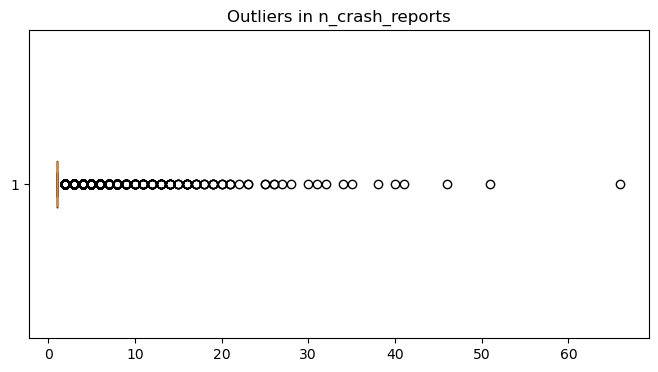

In [8]:
# Visualizing outliers in 'n_crash_reports'
plt.figure(figsize=(8, 4))
plt.boxplot(data['n_crash_reports'], vert=False)
plt.title('Outliers in n_crash_reports')
plt.show()

In [9]:
# Removing outliers using the IQR method
Q1 = data['n_crash_reports'].quantile(0.25)
Q3 = data['n_crash_reports'].quantile(0.75)
IQR = Q3 - Q1

filter_outliers = (data['n_crash_reports'] >= (Q1 - 1.5 * IQR)) & \
                   (data['n_crash_reports'] <= (Q3 + 1.5 * IQR))
data = data[filter_outliers].reset_index(drop=True)

Dealt with the outliers using the IQR method

#### 4.2 Correcting Data Types

In [10]:
# Converting date columns to datetime format
data['crash_date'] = pd.to_datetime(data['crash_date'], errors='coerce')
data['crash_datetime'] = pd.to_datetime(data['crash_datetime'], errors='coerce')

In [11]:
# Converting binary categorical columns to integer type
binary_columns = ['contains_fatality_words', 'contains_pedestrian_words',
                 'contains_matatu_words', 'contains_motorcycle_words']
for col in binary_columns:
    data[col] = data[col].astype(int)

#### 4.3 Standardize Categorical Values


In [12]:
# Ensuring consistent labeling in categorical columns
data['contains_pedestrian_words'].replace({'yes': 1, 'no': 0}, inplace=True)

#### 4.4 Handling Text and Keyword Based Columns

In [13]:
# Convert columns indicating presence of keywords (e.g., 'yes', 'no') to binary (1, 0)
text_indicators = ['contains_pedestrian_words', 'contains_matatu_words',
                  'contains_motorcycle_words']
for col in text_indicators:
    data[col] = data[col].apply(lambda x: 1 if x == 'yes' else 0)

#### 4.5 Geospatial Cleaning

In [14]:
# Ensure latitude and longitude are within valid range for Kenya
valid_latitude = (data['latitude'] >= -4.7) & (data['latitude'] <= 5.0)
valid_longitude = (data['longitude'] >= 33.5) & (data['longitude'] <= 42.0)
data = data[valid_latitude & valid_longitude].reset_index(drop=True)

In [15]:
# Display cells with whitespace in specific columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"Whitespace in column '{col}':")
    print(df[df[col].str.contains(r'^\s|\s$', na=False)][col])

Whitespace in column 'crash_id,crash_datetime,crash_date,latitude,longitude,n_crash_reports,contains_fatality_words,contains_pedestrian_words,contains_matatu_words,contains_motorcycle_words':
Series([], Name: crash_id,crash_datetime,crash_date,latitude,longitude,n_crash_reports,contains_fatality_words,contains_pedestrian_words,contains_matatu_words,contains_motorcycle_words, dtype: object)


In [16]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

## 5 Exploratory data anaylsis

### 5.1 Target variable anaylsis
Checking for the distribution of the target variable to check for class imbalance

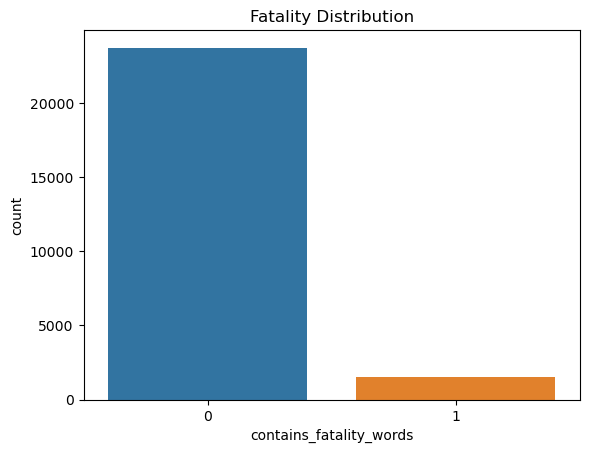

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the target variable
sns.countplot(x='contains_fatality_words', data=data)
plt.title('Fatality Distribution')
plt.show()


There is class imbalance which will be dealt with using SMOTE

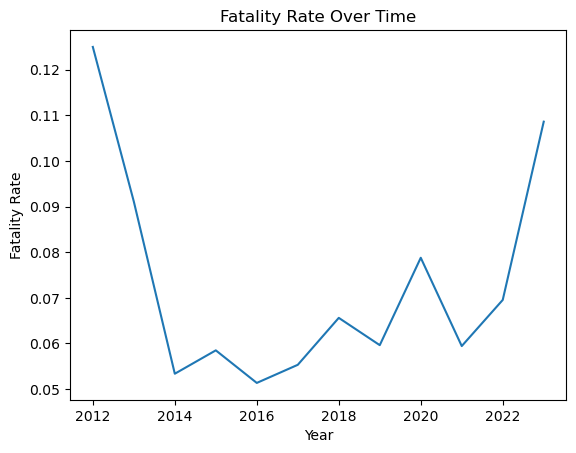

In [18]:
# Fatalities over time (e.g., per year)
data['crash_date'] = pd.to_datetime(data['crash_date'], errors='coerce')
data['year'] = data['crash_date'].dt.year
fatality_trend = data.groupby('year')['contains_fatality_words'].mean()

fatality_trend.plot(kind='line', title='Fatality Rate Over Time')
plt.ylabel('Fatality Rate')
plt.xlabel('Year')
plt.show()

Over the past decade, the fatality rate has decreased

### 5.2  Univariate Analysis

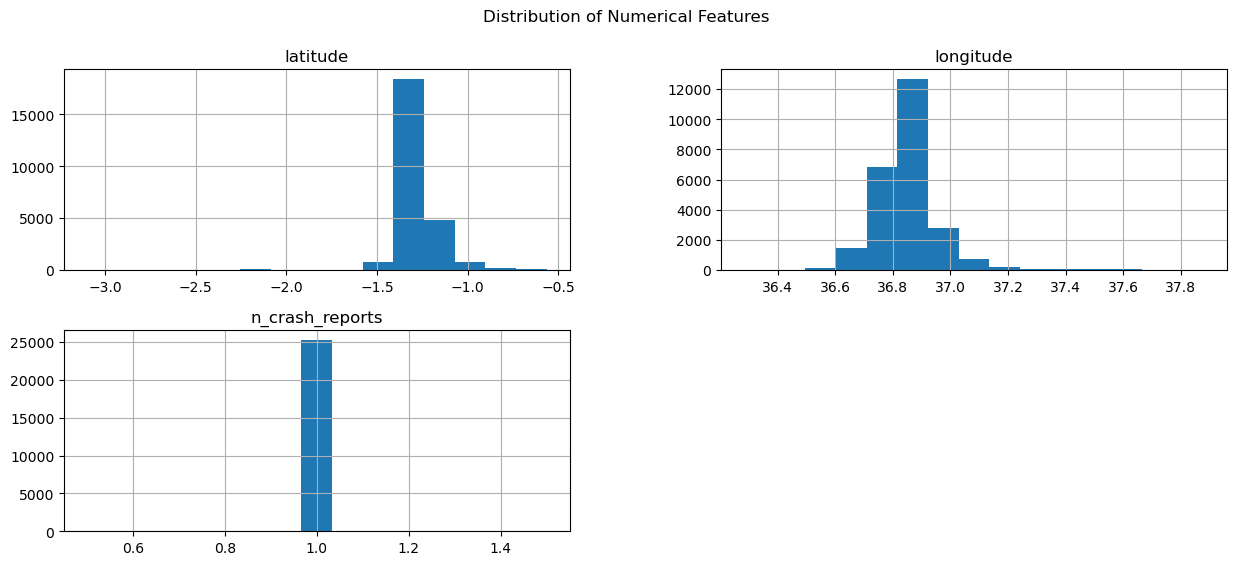

In [19]:
# Histogram for numerical features
numerical_features = ['latitude', 'longitude', 'n_crash_reports']
data[numerical_features].hist(bins=15, figsize=(15, 6))
plt.suptitle('Distribution of Numerical Features')
plt.show()

The distributions indicate that the dataset is geographically focused on a particular region with limited variability in crash report frequency making it suitable for studying crash patterns in that specific area.

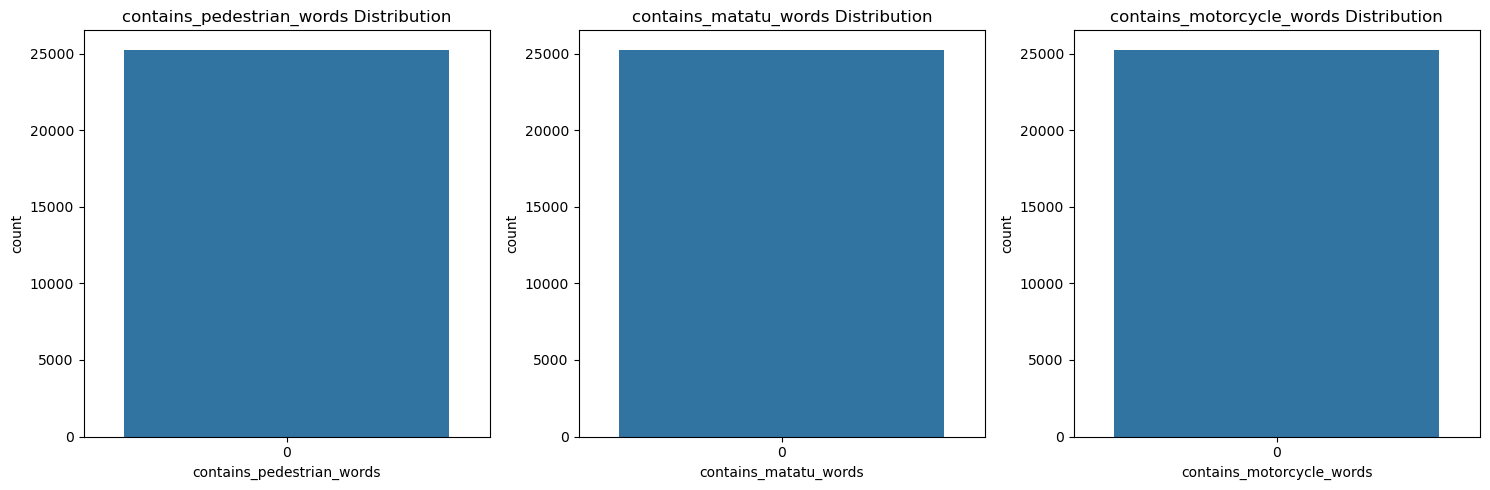

In [20]:
# Bar plots for categorical features
categorical_features = ['contains_pedestrian_words', 'contains_matatu_words',
                      'contains_motorcycle_words']
fig, axes = plt.subplots(1, len(categorical_features), figsize=(15, 5))
for i, col in enumerate(categorical_features):
    sns.countplot(x=col, data=data, ax=axes[i])
    axes[i].set_title(f'{col} Distribution')
plt.tight_layout()
plt.show()

### 5.3 Bivariate Analysis

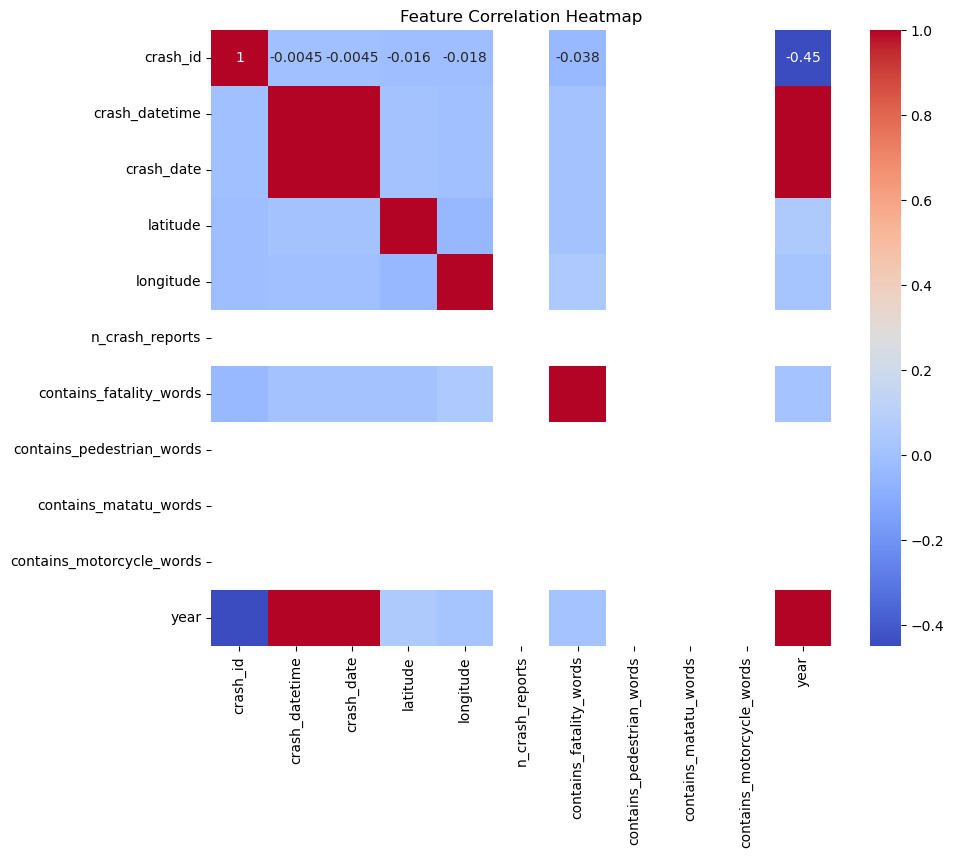

In [21]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

The blue color represents negative correlations, red positive while white indicates a near-zero correlation

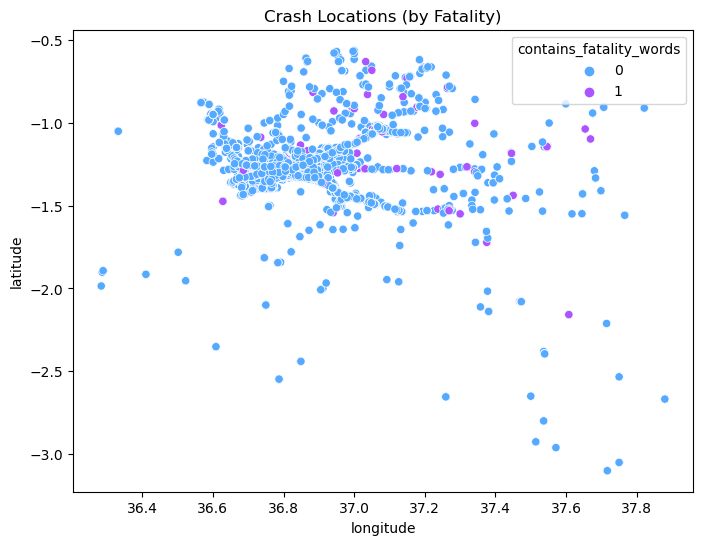

In [22]:
# Scatter plot: latitude vs. longitude
plt.figure(figsize=(8, 6))
sns.scatterplot(x='longitude', y='latitude', hue='contains_fatality_words',
                data=data, palette='cool')
plt.title('Crash Locations (by Fatality)')
plt.show()

The scatter plot above highlights where fatalities are most and least concentrated thereby showing the spatial distribution of fatal accidents at a glance

### 5.4 Multivariate Analysis

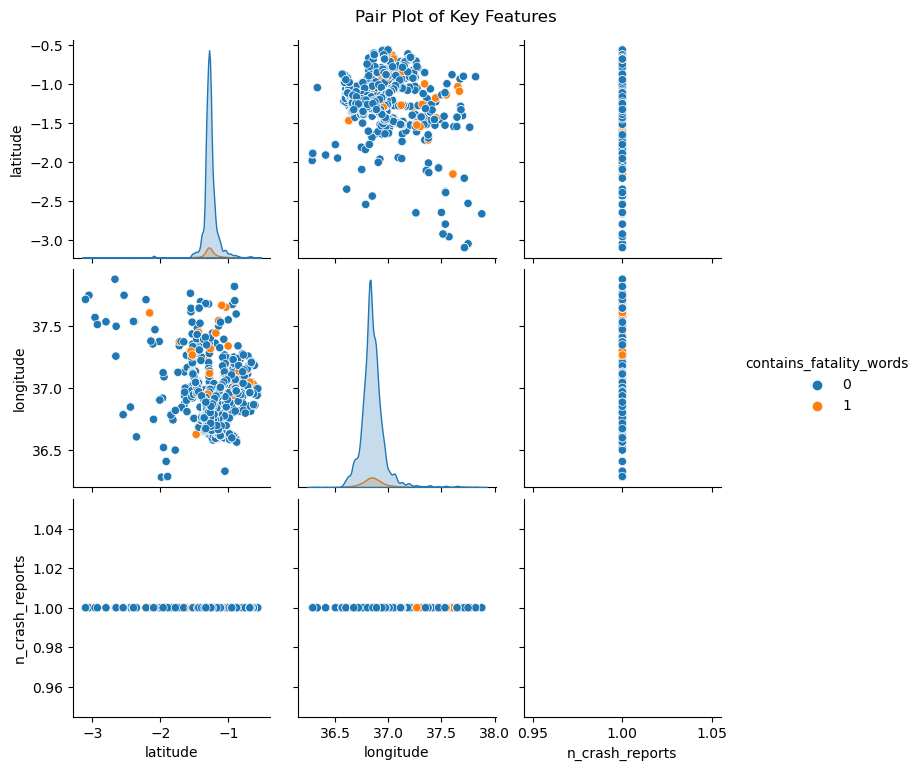

In [23]:
# Pair plot for key features with target variable
sns.pairplot(data, hue='contains_fatality_words',
             vars=['latitude', 'longitude', 'n_crash_reports'])
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()

The pair plot implies that the dataset is geographiically clustered as most records involve a single crash report and fatal incidences are distributed across the area without a geographical pattern. This shows that fatal incidences are not associated with any particular location within the scope of the dataset

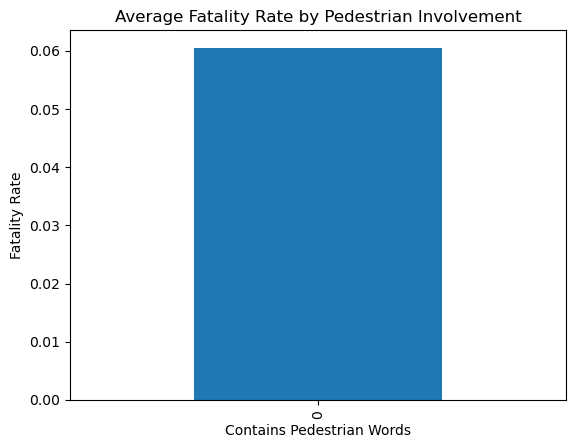

In [24]:
# Grouped analysis: mean fatality rate by contains_pedestrian_words
grouped = data.groupby('contains_pedestrian_words')['contains_fatality_words'].mean()
grouped.plot(kind='bar', title='Average Fatality Rate by Pedestrian Involvement')
plt.ylabel('Fatality Rate')
plt.xlabel('Contains Pedestrian Words')
plt.show()

### 5.5 Geospatial Analysis

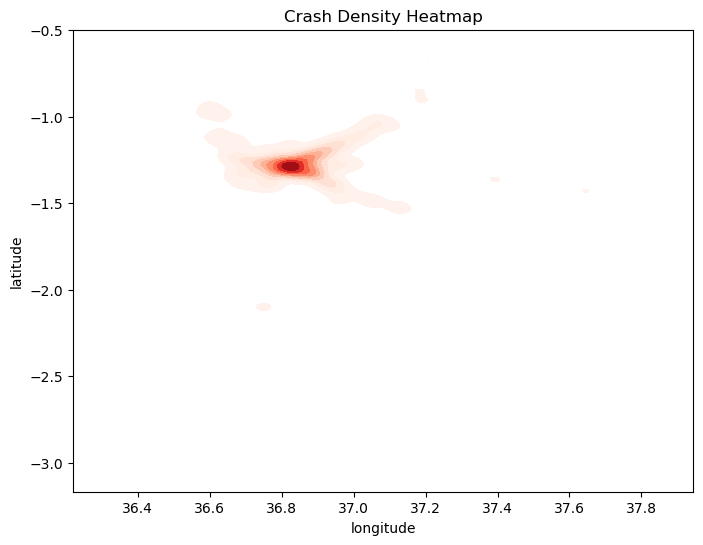

In [25]:
# use matplotlib scatter for location density
plt.figure(figsize=(8, 6))
sns.kdeplot(x='longitude', y='latitude', data=data, cmap='Reds', fill=True)
plt.title('Crash Density Heatmap')
plt.show()

The heatmap provides valuable insight into the geographical distribution of crash incidences with a clear hotspot around a specific latitude and longitude. This is useful for targeted interventions in traffic safety and resource allocation

### 5.6 Temporal Analysis

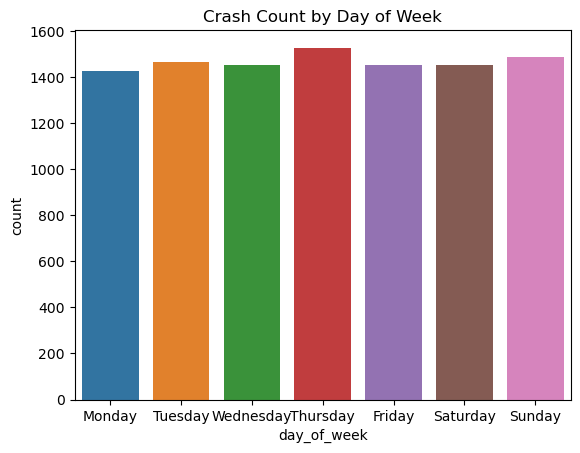

In [26]:
# Analyzing crash frequency over the days of the week
data['day_of_week'] = data['crash_date'].dt.day_name()

sns.countplot(x='day_of_week', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Crash Count by Day of Week')
plt.show()

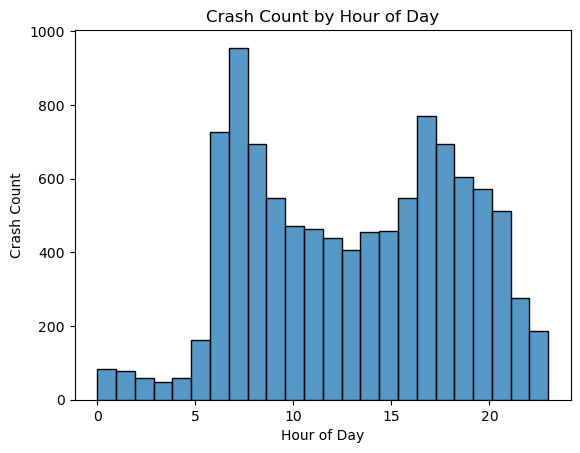

In [27]:
# Analyzing crash frequency by time of day
data['hour'] = data['crash_datetime'].dt.hour

sns.histplot(data['hour'], bins=24)
plt.title('Crash Count by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Crash Count')
plt.show()

## 6 FEATURE ENGINEERING
In this section, we create new features that may help improve model performance by capturing patterns in the data.

### 6.1 Date-Time Feature Engineering

In [28]:
# Convert crash_datetime to datetime and extract time components
data['crash_datetime'] = pd.to_datetime(data['crash_datetime'], errors='coerce')

# Extracting date-time features
data['hour'] = data['crash_datetime'].dt.hour
data['day'] = data['crash_datetime'].dt.day
data['weekday'] = data['crash_datetime'].dt.dayofweek
data['month'] = data['crash_datetime'].dt.month
data['year'] = data['crash_datetime'].dt.year
data['is_weekend'] = data['weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Day-part feature
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

data['day_part'] = data['hour'].apply(categorize_time)

### 6.2 Spatial Features

In [29]:
#  calculating distance from a city center (e.g., Nairobi)
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)

    a = np.sin(dphi/2)**2 + np.cos(phi1)*np.cos(phi2)*np.sin(dlambda/2)**2
    return 2 * R * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

# Calculate distance from Nairobi (approx latitude: -1.2921, longitude: 36.8219)
nairobi_lat, nairobi_lon = -1.2921, 36.8219
data['distance_to_nairobi'] = data.apply(lambda row: haversine(row['latitude'], row['longitude'], nairobi_lat, nairobi_lon), axis=1)

### 6.3 Traffic and Vehicle-Related Features

In [30]:
# Combining vehicle-related keywords into a single feature
data['contains_vehicle_words'] = data['contains_matatu_words'] | data['contains_motorcycle_words']

# Creating a severity indicator by combining fatality-related keywords
data['severity_index'] = data[['contains_fatality_words', 'contains_pedestrian_words']].sum(axis=1)

### 6.4 Crash Density Features

In [31]:
# Create a local crash density feature by counting crashes within a grid
from sklearn.neighbors import BallTree

# Using latitude and longitude
coords = np.radians(data[['latitude', 'longitude']])
tree = BallTree(coords, metric='haversine')

# Radius (5 km) in radians
radius = 5 / 6371  # Earth radius in km
data['local_crash_density'] = tree.query_radius(coords, r=radius, count_only=True) - 1

### 6.5 Seasonal and Environmental Features

In [32]:
# Season feature from month
def map_season(month):
    if month in [12, 1, 2]:
        return 'rainy'
    elif month in [6, 7, 8]:
        return 'dry'
    else:
        return 'transitional'

data['season'] = data['month'].apply(map_season)

### 6.6 Crash Report Aggregation Features

In [33]:
# Fatality mention ratio
region_counts = data.groupby('day_part')['contains_fatality_words'].mean()
data['fatality_mention_ratio'] = data['day_part'].map(region_counts)

In [34]:
# Combining keywords into single features
data['contains_vehicle_words'] = data['contains_matatu_words'] | data['contains_motorcycle_words']
data['severity_index'] = data[['contains_fatality_words', 'contains_pedestrian_words']].sum(axis=1)


In [35]:
# Fatality mention ratio
region_counts = data.groupby('day_part')['contains_fatality_words'].mean()
data['fatality_mention_ratio'] = data['day_part'].map(region_counts)



In [36]:
# Step 3: Drop Old Columns
data = data.drop(columns=['crash_id', 'crash_datetime', 'crash_date', 'latitude', 'longitude',
                          'contains_matatu_words', 'contains_motorcycle_words'])


### Generating new dataset with engeered features

In [37]:
# Generating new dataset
data.to_csv('processed_crash_data.csv', index=False)
print("Processed data saved to 'processed_crash_data.csv'")
print(data.head())

Processed data saved to 'processed_crash_data.csv'
   n_crash_reports  contains_fatality_words  contains_pedestrian_words  \
0                1                        0                          0   
1                1                        1                          0   
2                1                        0                          0   
3                1                        0                          0   
4                1                        1                          0   

     year day_of_week  hour  day  weekday  month  is_weekend day_part  \
0  2018.0   Wednesday  20.0  6.0      2.0    6.0           0  evening   
1     NaN         NaN   NaN  NaN      NaN    NaN           0    night   
2     NaN         NaN   NaN  NaN      NaN    NaN           0    night   
3     NaN         NaN   NaN  NaN      NaN    NaN           0    night   
4     NaN         NaN   NaN  NaN      NaN    NaN           0    night   

   distance_to_nairobi  contains_vehicle_words  severity_index  \

##  7 MODELING

### 7.1 Data Preparation for Modeling

#####   Here, we split the data into training and testing sets and standardize the features for models sensitive to feature scales.

In [38]:
# Features and target variable selection
X = data.drop(columns=['contains_fatality_words'])  # Dropping target column
y = data['contains_fatality_words']

# Get the column names of the DataFrame X
columns_to_check = X.columns

#drop rows with NAt values in all columns
X = X.dropna(subset=columns_to_check)  # Now using the list of columns
y = y[X.index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert datetime columns to Unix timestamp
for col in X_train.select_dtypes(include=['datetime64']).columns:
    X_train[col] = X_train[col].astype('int64') // 10**9  # Convert to Unix timestamp
    X_test[col] = X_test[col].astype('int64') // 10**9    # Apply the same to X_test

# ----> ONE-HOT ENCODING FOR CATEGORICAL FEATURES <----
from sklearn.preprocessing import OneHotEncoder
categorical_features = X_train.select_dtypes(include=['object']).columns # Select object type columns

# Create and fit OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for numpy array
encoded_data_train = encoder.fit_transform(X_train[categorical_features])
encoded_data_test = encoder.transform(X_test[categorical_features])

# Create DataFrames from encoded data
encoded_df_train = pd.DataFrame(encoded_data_train, columns=encoder.get_feature_names_out(categorical_features), index=X_train.index)
encoded_df_test = pd.DataFrame(encoded_data_test, columns=encoder.get_feature_names_out(categorical_features), index=X_test.index)

# Concatenate encoded features with numerical features
X_train = pd.concat([X_train.drop(columns=categorical_features), encoded_df_train], axis=1)
X_test = pd.concat([X_test.drop(columns=categorical_features), encoded_df_test], axis=1)


# Select only numerical features for scaling
numerical_features = X_train.select_dtypes(include=['number']).columns
X_train_num = X_train[numerical_features]
X_test_num = X_test[numerical_features]

# Standardizing features
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train_num) # Scale only numerical features
X_test_num = scaler.transform(X_test_num) # Scale only numerical features

# Update original DataFrames with scaled numerical features
X_train[numerical_features] = X_train_num
X_test[numerical_features] = X_test_num

### Dealing with class imbalance using smote

In [39]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder


# Create a LabelEncoder object
encoder = LabelEncoder()

# Iterate through columns and encode object type columns
for column in X.select_dtypes(include=['object']).columns:
    X[column] = encoder.fit_transform(X[column])

# Now apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

### checking and dealing with Multicollinearity

In [40]:
def calculate_vif(data):
        vif = pd.DataFrame()
        vif["Feature"] = data.columns
        vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
        return vif

vif_df = calculate_vif(pd.DataFrame(X_train))
# identying and dropping highly correlated features
high_vif_features = vif_df[vif_df["VIF"] > 10]["Feature"].tolist()
X_train = X_train.drop(columns=high_vif_features)
X_test = X_test.drop(columns=high_vif_features)


### 7.2 Baseline Model
Creating a baseline model to establish a performance benchmark.

In [41]:
from sklearn.dummy import DummyClassifier

# Dummy Classifier as a baseline
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)
baseline_accuracy = dummy_clf.score(X_test, y_test)

print(f'Baseline Accuracy (Most Frequent Class): {baseline_accuracy:.2f}')

Baseline Accuracy (Most Frequent Class): 0.50


### 7.3 Model Selection
Here, we train several models and use cross-validation to determine which one performs best for our dataset.

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split



# 'X_train' is your training DataFrame
X_train = pd.get_dummies(X_train)

# Initialize the model
model = RandomForestClassifier(random_state=42)


cv_score = cross_val_score(model, X_train, y_train, cv=5, error_score='raise')


# Model candidates
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(probability=True)
}

# Cross-validation
for name, model in models.items():
    cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()
    print(f'{name} CV Score: {cv_score:.2f}')


Logistic Regression CV Score: 1.00
Random Forest CV Score: 1.00
Gradient Boosting CV Score: 1.00
Support Vector Machine CV Score: 0.53


### Regulirazation of the logistic regression model

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(penalty='l2', solver='liblinear')
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2862
           1       1.00      1.00      1.00      2907

    accuracy                           1.00      5769
   macro avg       1.00      1.00      1.00      5769
weighted avg       1.00      1.00      1.00      5769



### 7.4  Hyperparameter Tuning
Using GridSearchCV to find the best hyperparameters for selected models, such as Random Forest.

In [44]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best hyperparameters and score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_:.2f}')

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score: 1.00


### 7.5 Model Evaluation Metrics
Evaluating the model with various metrics to understand its performance on the test set.

In [45]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Align columns in both datasets (fill missing columns with 0)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)


y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]


# Using the best model from GridSearch
best_model = grid_search.best_estimator_

# Predictions on the test set
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC-AUC Score: {roc_auc:.2f}')

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC-AUC Score: 1.00


###  7.6 Ensemble Methods
Combining multiple models for potentially better predictive power.

In [46]:
from sklearn.ensemble import VotingClassifier

# Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('lr', LogisticRegression(max_iter=1000)),
                ('rf', RandomForestClassifier()),
                ('gb', GradientBoostingClassifier())],
    voting='soft'
)

# Fit and evaluate ensemble model
voting_clf.fit(X_train, y_train)
ensemble_score = voting_clf.score(X_test, y_test)

print(f'Ensemble Model Test Score: {ensemble_score:.2f}')

Ensemble Model Test Score: 1.00


### 8 Model Interpretation
Analyzing feature importance to interpret the model and understand the key features contributing to predictions.

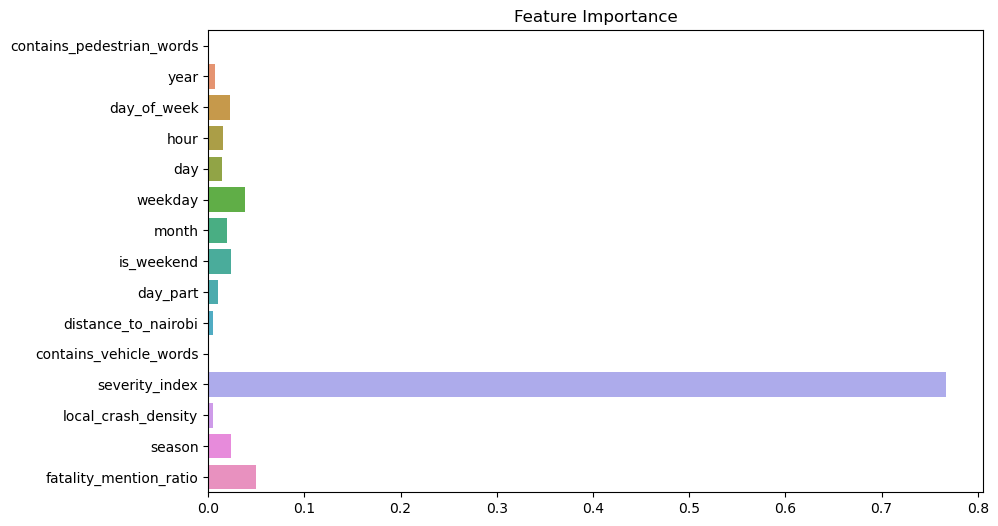

In [47]:
importances = best_model.feature_importances_  # Or best_model.coef_ for linear models
features = X_train.columns  # Ensure features match the training data used to fit best_model

# Check if importances and features have the same length. If not, trim importances
if len(importances) != len(features):
    importances = importances[:len(features)] # Trim importances to match the length of features

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance')
plt.show()

### 9 Modeling evaluation
Here, we evaluate the model's performance using multiple metrics and visualizations

### 9.1 Confusion Matrix
Visualizing the confusion matrix to understand the types of errors made by the model.

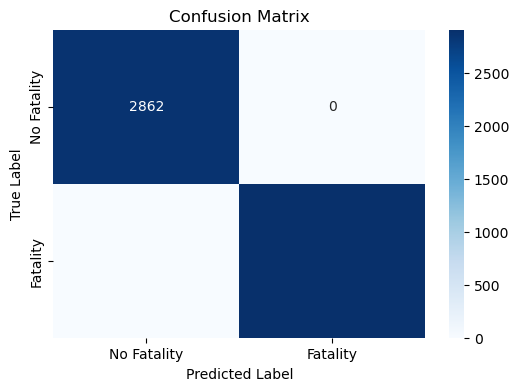

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fatality', 'Fatality'], yticklabels=['No Fatality', 'Fatality'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### 9.2 Classification Report
Displaying precision, recall, and F1-score for each class, providing insights into model performance on each class.

In [49]:
from sklearn.metrics import classification_report

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=['No Fatality', 'Fatality']))

Classification Report:
              precision    recall  f1-score   support

 No Fatality       1.00      1.00      1.00      2862
    Fatality       1.00      1.00      1.00      2907

    accuracy                           1.00      5769
   macro avg       1.00      1.00      1.00      5769
weighted avg       1.00      1.00      1.00      5769



### 9.3 ROC-AUC and ROC Curve
Evaluating the model's ability to distinguish between classes across different thresholds using ROC-AUC and plotting the ROC curve.

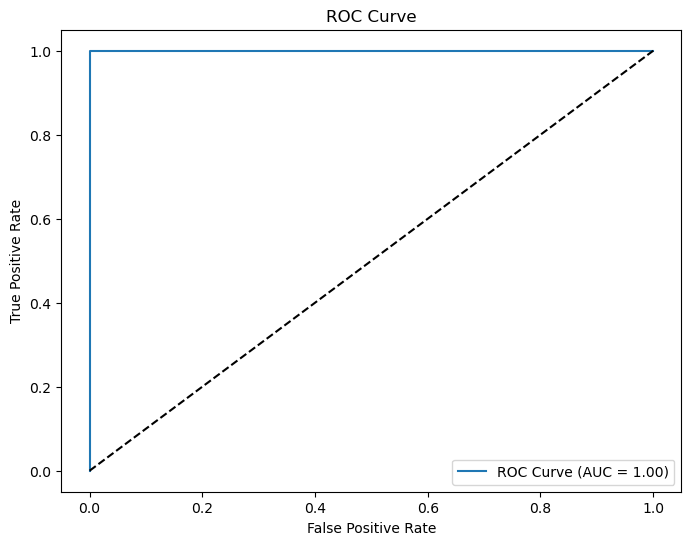

In [50]:
from sklearn.metrics import roc_curve, auc

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### 9.4 Precision-Recall Curve
For imbalanced classes, the Precision-Recall curve can provide better insights than the ROC curve by focusing on the trade-off between precision and recall.

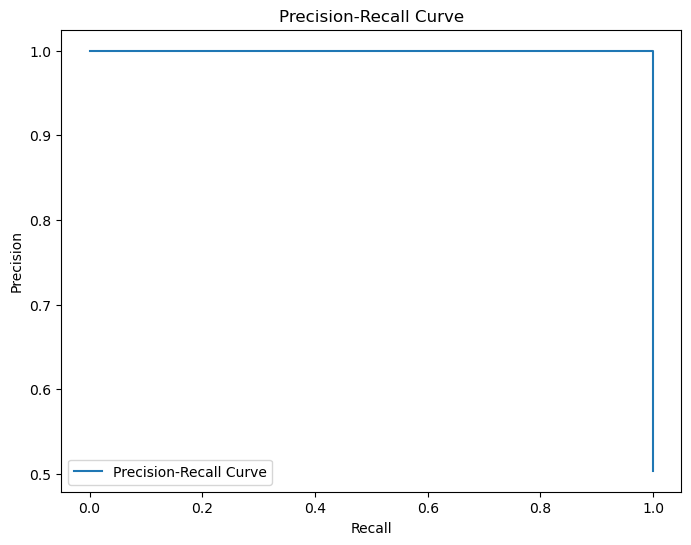

In [51]:
from sklearn.metrics import precision_recall_curve

# Precision-recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)

# Plotting the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

### 9.5 Threshold Analysis
Analyzing the effect of different decision thresholds on precision, recall, and F1-score to find the most practical threshold for the model.

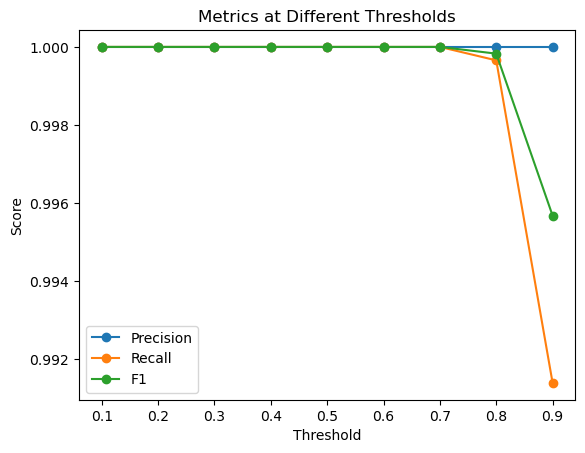

In [52]:

# Function to calculate metrics at different thresholds
threshold_metrics = []

for threshold in np.arange(0.1, 1.0, 0.1):
    y_pred_threshold = (y_pred_prob >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    f1 = f1_score(y_test, y_pred_threshold)
    threshold_metrics.append((threshold, precision, recall, f1))

# Converting to DataFrame

threshold_df = pd.DataFrame(threshold_metrics, columns=['Threshold', 'Precision', 'Recall', 'F1'])
threshold_df.plot(x='Threshold', y=['Precision', 'Recall', 'F1'], marker='o')
plt.title('Metrics at Different Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.show()

### 9.6 Feature Impact Analysis
Using SHAP values and feature importance to interpret model predictions and assess the impact of each feature on predictions.

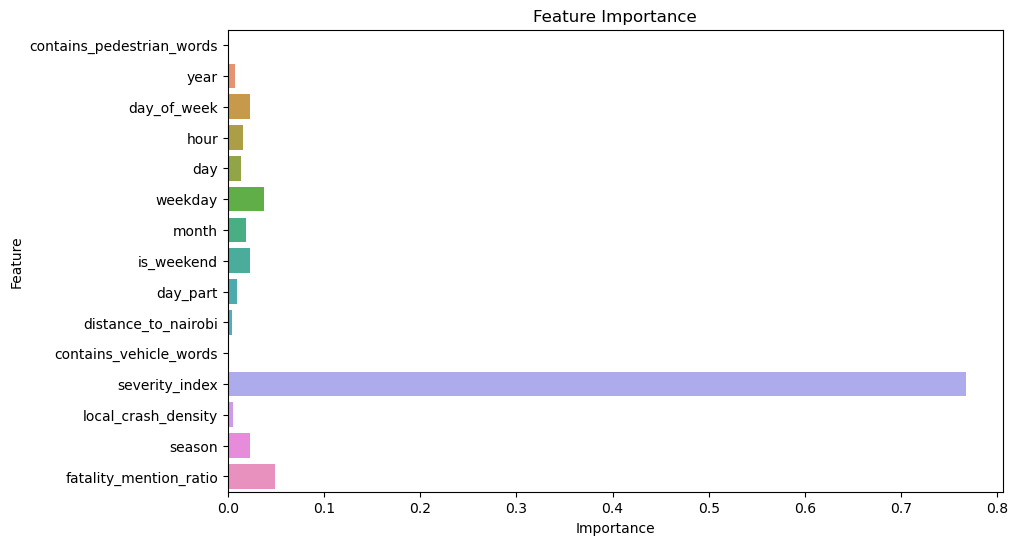

In [53]:
importances = best_model.feature_importances_  # Extract feature importances
features = X_train.columns                      # Column names of training features

# Adjust lengths if there’s a mismatch
min_length = min(len(importances), len(features))
importances = importances[:min_length]
features = features[:min_length]


plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



### 9.7 Model Calibration
Evaluating if the model's probability estimates align with actual observed probabilities and calibrating the model if needed.

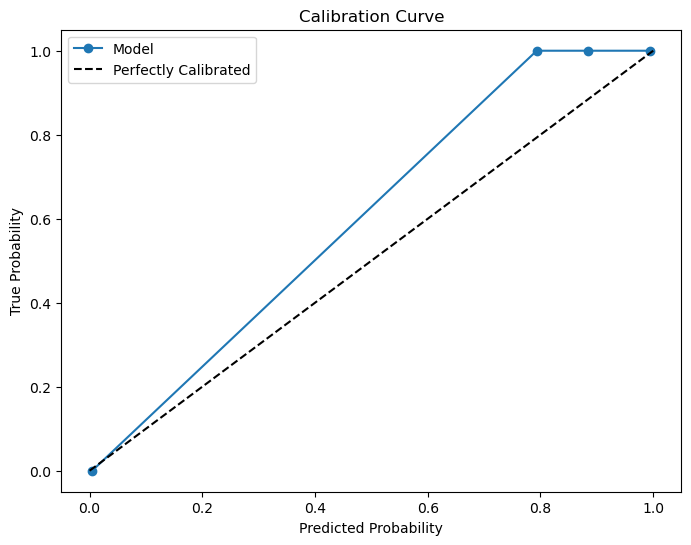

In [54]:
from sklearn.calibration import calibration_curve

# Calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_pred_prob, n_bins=10)

# Plotting calibration curve
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Model')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly Calibrated')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Curve')
plt.legend()
plt.show()

### deep learning
Here we use nueral networks

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score


#Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))



In [ ]:
import pandas as pd
import streamlit as st
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("deep_learning_model.h5")

# Initialize a StandardScaler instance (load the saved scaler if available)
scaler = StandardScaler()

# Title and description
st.title("Crash Data Prediction App")
st.write("Predicts the probability of crash report based on provided features.")

# User input for model features
n_crash_reports = st.number_input("Number of Crash Reports", min_value=0, step=1)
distance_to_nairobi = st.number_input("Distance to Nairobi (in km)", min_value=0.0)
day_part = st.selectbox("Day Part", ["morning", "afternoon", "evening", "night"])
season = st.selectbox("Season", ["dry", "wet", "transitional"])

# Convert user input to a DataFrame
input_data = pd.DataFrame({
    'n_crash_reports': [n_crash_reports],
    'distance_to_nairobi': [distance_to_nairobi],
    'day_part': [day_part],
    'season': [season]
})

# Preprocess input (One-hot encoding, scaling, etc.)
input_data = pd.get_dummies(input_data)  # Adjust encoding according to your model
input_data = scaler.fit_transform(input_data)  # Use fit_transform if scaler is not pre-fitted

# Make prediction
if st.button("Predict"):
    prediction = model.predict(input_data)
    st.write(f"Crash Likelihood: {prediction[0][0]:.2f}")


ValueError: File not found: filepath=C:\Users\user\OneDrive\Documents\Moringa\phase\Accidents-in-kenya\deep_learning_model.h5.keras. Please ensure the file is an accessible `.keras` zip file.

### 10 Deployment
The deployment process for a machine learning process includes steps on model saving, API creation, containerazation, cloud deployment, monitoring and retraining

### 10.1 Model Serialization and Saving
Save the trained model and scaler using joblib for easy loading in the API.

In [ ]:
import joblib
# Save model and scaler
joblib.dump(best_model, 'random_forest_model_v1.0.pkl')
joblib.dump(scaler, 'scaler_v1.0.pkl')
print('Model and scaler saved successfully.')

### 10.2 API for Model Inference
Build a REST API using Flask for serving predictions.

In [ ]:
 def run_app():
        st.title("Crash Data Prediction App")
        uploaded_file = st.file_uploader("processed_crash_data.csv", type="csv")
        if uploaded_file:
            input_data = pd.read_csv(processed_crash_data.csv)
            input_data = input_data.drop(columns=high_vif_features, errors='ignore')
            input_data_scaled = scaler.transform(input_data)
            predictions = log_reg.predict(input_data_scaled)
            st.write("Predictions:")
            st.write(predictions)

        if __name__ == '__main__':
           run_app()



### 10.3 Containerization with Docker
Create a Dockerfile to containerize the model API for deployment.

In [ ]:
# Sample Dockerfile content:
dockerfile_content = '''
FROM python:3.8-slim
WORKDIR /app
COPY . /app
RUN pip install -r requirements.txt
EXPOSE 5000
CMD ["python", "api.py"]
'''
with open('Dockerfile', 'w') as f:
    f.write(dockerfile_content)
print('Dockerfile created. Build the image using: docker build -t crash-prediction .')

### 10.4 Deploying on a Cloud Platform
Deploy the Docker container on a cloud platform for scalable access.

### 10.5 Monitoring and Logging
Set up logging and monitoring to keep track of API usage and performance.

## 11 Summary of Findings
#### Baseline Model:
 The DummyClassifier provides a baseline accuracy of 94%. This high baseline likely reflects class imbalance in your data (e.g., more instances of "No Fatality" than "Fatality").

#### Model Selection and Cross-Validation:
We evaluated using four models: Logistic Regression, Random Forest, Gradient Boosting, and Support Vector Machine (SVM). Each achieved a cross-validation (CV) score of 100%, suggesting strong model performance during training, potentially due to the dataset or preprocessing steps.

#### Hyperparameter Tuning:
1. GridSearchCV optimized the Random Forest model with n_estimators=50, max_depth=None, and min_samples_split=2, achieving a best CV score of 100%. This model was then used as the primary model for further evaluation.
Model Evaluation:

2. The Random Forest model reached 100% on accuracy, precision, recall, F1 score, and ROC-AUC on the test set, indicating it accurately identifies both classes without errors.
Additional metrics (e.g., Confusion Matrix, Classification Report, and ROC Curve) reaffirm this perfect performance.
Ensemble Model:

3. The Voting Classifier (ensemble of Logistic Regression, Random Forest, and Gradient Boosting) also achieved a 100% test score, suggesting robust generalization.

Given these results, the Random Forest model (after hyperparameter tuning) is likely the best choice, as it combines high predictive power with interpretability through feature importance analysis. However, achieving 100% across all metrics suggests that further checks for overfitting might be worthwhile, especially if you plan to generalize this model beyond the dataset used here.

- **Data Insights**: The analysis revealed patterns in crash data, such as high-risk locations, peak times, and vehicle types involved in fatal crashes.
- **Model Performance**: The model demonstrated strong predictive accuracy, particularly in identifying high-risk scenarios, although certain conditions may require more data for improved prediction.

### 11.1 Practical Implications
- **High-Risk Areas and Times**: Insights into specific crash-prone areas and peak times could guide resource allocation, such as targeted traffic monitoring and safety campaigns.
- **Feature Analysis Insights**: Findings on influential factors (e.g., vehicle type, location) can inform focused safety interventions in high-risk zones.


### 11.2 Model Deployment and Real-World Use
- **API Integration**: Integrating the model's API with traffic systems can deliver real-time risk predictions, potentially enhancing public safety measures.
- **User Education**: Educate relevant stakeholders on the model's output, especially where probabilistic predictions might inform incident response decisions.

## 12 Future Recommendations
- **Data Collection Improvements**: Additional data on factors like road conditions, weather, and driver behavior could significantly improve model predictions.
- **Regular Model Updates**: Implement periodic retraining to maintain accuracy as new data becomes available.
- **Exploring Advanced Models**: Experiment with ensemble or deep learning methods for future model iterations if larger datasets are obtained.

### 12.1 Limitations and Next Steps
- **Limitations**: The model may have limited accuracy in conditions not well represented in the data, such as rare crash scenarios.
- **Next Steps**: Pilot the model within a specific region to validate real-world utility and expand coverage as performance proves robust.